# Visualizing Earnings Based on College Majors
## Goals
In this project I visualize the job outcomes of students who graduated from college between 2010 and 2012. Using visualizations, I explore questions from the dataset such as: 
* Do students in more popular majors make more money? 
* How many majors are predominantly male? Predominantly female? 
* Which category of majors have the most students?

## Data
I'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* ``Rank`` - Rank by median earnings (the dataset is ordered by this column).
* ``Major_code`` - Major code.
* ``Major`` - Major description.
* ``Major_category`` - Category of major.
* ``Total`` - Total number of people with major.
* ``Sample_size`` - Sample size (unweighted) of full-time.
* ``Men`` - Male graduates.
* ``Women`` - Female graduates.
* ``ShareWomen`` - Women as share of total.
* ``Employed`` - Number employed.
* ``Median`` - Median salary of full-time, year-round workers.
* ``Low_wage_jobs`` - Number in low-wage service jobs.
* ``Full_time`` - Number employed 35 hours or more.
* ``Part_time`` - Number employed less than 35 hours.

I'll set up the environment by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

I'll read the dataset into a dataframe to start exploring the data.

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


It looks like Petroleum Engineering is ranked number one within this dataset.
I'll take a look at the data types to make sure the columns are the correct data type.

In [3]:
recent_grads.dtypes

Rank                      int64
Major_code                int64
Major                    object
Total                   float64
Men                     float64
Women                   float64
Major_category           object
ShareWomen              float64
Sample_size               int64
Employed                  int64
Full_time                 int64
Part_time                 int64
Full_time_year_round      int64
Unemployed                int64
Unemployment_rate       float64
Median                    int64
P25th                     int64
P75th                     int64
College_jobs              int64
Non_college_jobs          int64
Low_wage_jobs             int64
dtype: object

Now I'll check for missing values.

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It looks like there are some columns that are missing values, I'll go ahead and drop these rows since matplotlib will give me an error if I don't.

In [5]:
recent_grads = recent_grads.dropna()

Now I'll use ``.describe()`` again to make sure all columns have the same number of values.

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Pandas: Scatter Plots
Now, I will generate scatter plots to explore the following relationships:
* `Sample_size`and `Median`
* `Sample_size` and `Unemployment_rate`
* `Full_time` and `Median`
* `ShareWomen` and `Unemployment_rate`
* `Men` and `Median`
* `Women` and `Median`

#### Sample Size and Median Salary

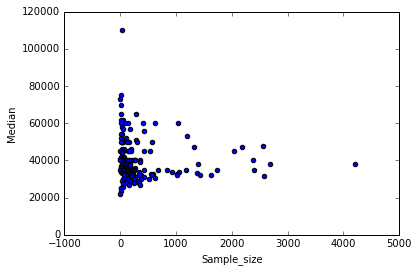

In [7]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

#### Sample Size and Unemployment Rate

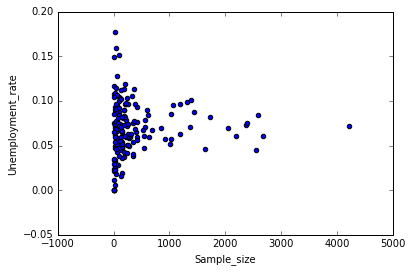

In [8]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

#### Full Time Employees and Median Salary

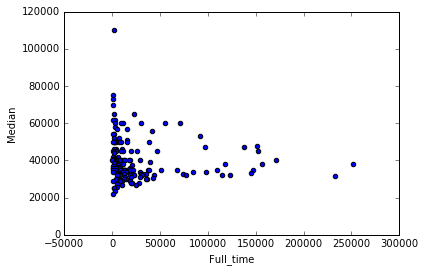

In [9]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')

#### Share of Women and Unemployment Rate

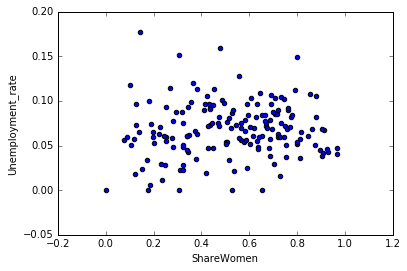

In [10]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

#### Men and Median Salary

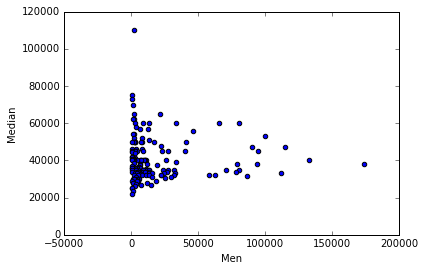

In [11]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')

#### Women and Median Salary

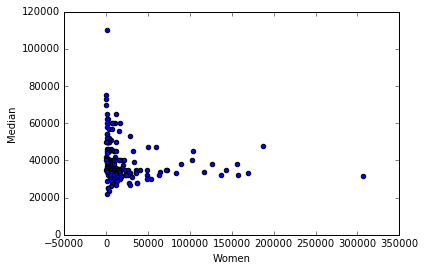

In [12]:
ax6 = recent_grads.plot(x='Women', y='Median', kind='scatter')

From the above six scatter plots, there does not seem to be any meaningful trends to answer any of the questions posed at the beginning of this project. Scatter plots may not be the best way to visualize the data.

## Pandas: Histograms
Exploring the distribution of data through histograms may give some better insights.

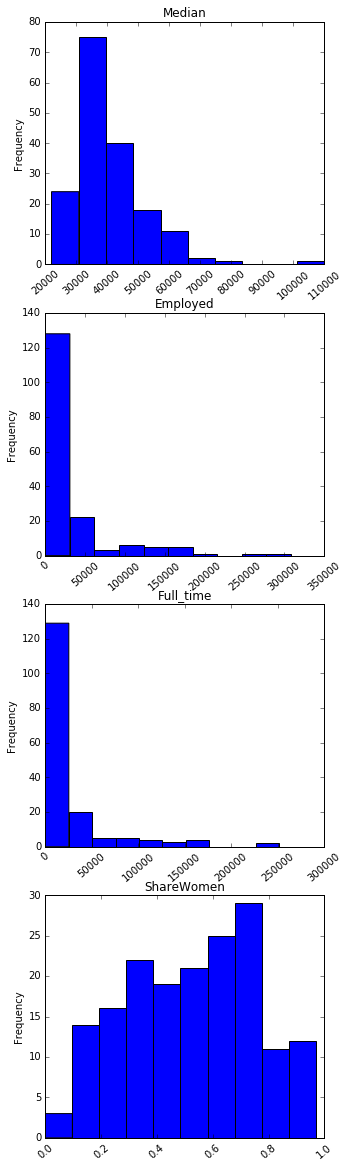

In [13]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,20))
for r in range(1,5):
    ax = fig.add_subplot(4,1,r)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    ax.set_title(cols[r])

Based on the histograms above for Median Salary, Employed, Full_time, and ShareWomen I've gathered the following insights:
* The data for median salary is right-skewed showing most students make between \$30-40K but there are some outliers that make between \$100-110K.
* There is a high frequency of college majors resulting in 25,000 students being employed and working full-time.
* The frequency for the share of women within a major looks to be bimodal. The share of women is highest at 35%, then decreases and increases again at 75%.

I'll now examine the frequencies for Unemployment_rate, Men, and Women.

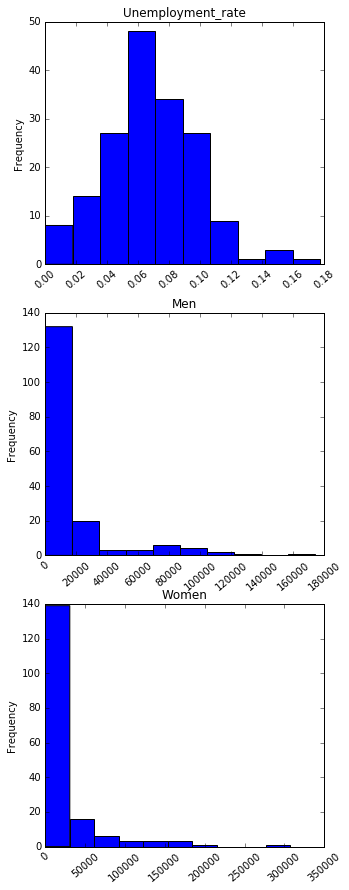

In [14]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,20))
for r in range(5,8):
    ax = fig.add_subplot(4,1,r-3)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    ax.set_title(cols[r])

From these distributions I've made the following insights:
* The distribution for unemployment rate looks slightly right-skewed with most college majors reporting between 5-9% unemployment rate.
* Both distributions of men and women in college majors are severely right-skewed.
* Most college majors report up to 20,000 men and up to 25,000 women.
* There are some outliers with a few majors reporting between 80-100K men and 100-170K women.

I've made some valuable insights from these histograms but still am unable to answer the three main questions. I'll look at these questions closer to determine how to answer them.

## Do students in more popular majors make more money?
To answer this question I'll look at the most and least popular majors in the data set again.

In [15]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


Since I'm only interested in majors and salary, I'll create a new data frame with the data of interest.

In [16]:
majors_totals_salaries = recent_grads[['Major','Total','Median']]
majors_totals_salaries.head()

,Major,Total,Median
0,PETROLEUM ENGINEERING,2339.0,110000
1,MINING AND MINERAL ENGINEERING,756.0,75000
2,METALLURGICAL ENGINEERING,856.0,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,70000
4,CHEMICAL ENGINEERING,32260.0,65000


I'll need to sort the data to determine the most and least popular majors.

In [17]:
majors_totals_salaries.sort_values("Total", ascending=False, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
top_majors = majors_totals_salaries[0:10]
print(top_majors)

                                      Major     Total  Median
145                              PSYCHOLOGY  393735.0   31500
76   BUSINESS MANAGEMENT AND ADMINISTRATION  329927.0   38000
123                                 BIOLOGY  280709.0   33400
57                         GENERAL BUSINESS  234590.0   40000
93                           COMMUNICATIONS  213996.0   35000
34                                  NURSING  209394.0   48000
77         MARKETING AND MARKETING RESEARCH  205211.0   38000
40                               ACCOUNTING  198633.0   45000
137         ENGLISH LANGUAGE AND LITERATURE  194673.0   32000
78         POLITICAL SCIENCE AND GOVERNMENT  182621.0   38000


In [19]:
bottom_majors = majors_totals_salaries.tail(10)
print(bottom_majors)

                                          Major   Total  Median
19                              COURT REPORTING  1148.0   54000
172                             LIBRARY SCIENCE  1098.0   22000
2                     METALLURGICAL ENGINEERING   856.0   73000
55                    SCHOOL STUDENT COUNSELING   818.0   41000
120  EDUCATIONAL ADMINISTRATION AND SUPERVISION   804.0   34000
1                MINING AND MINERAL ENGINEERING   756.0   75000
33       GEOLOGICAL AND GEOPHYSICAL ENGINEERING   720.0   50000
112                                SOIL SCIENCE   685.0   35000
52             MATHEMATICS AND COMPUTER SCIENCE   609.0   42000
73                        MILITARY TECHNOLOGIES   124.0   40000


Now that I have the 10 most and least popular majors I can visualize the findings using a bar chart.

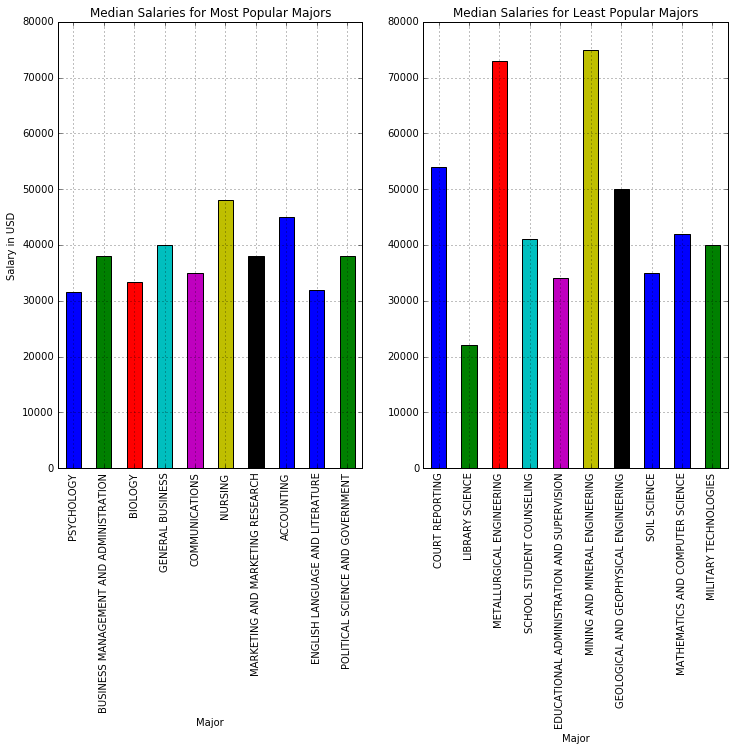

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

ax1 = top_majors.plot.bar(x='Major',y='Median', ax=ax[0], legend=False)
ax1.set_title("Median Salaries for Most Popular Majors")
ax1.set_ylim(0,80000)
ax1.set_ylabel("Salary in USD")
ax1.grid()

ax2 = bottom_majors.plot.bar(x='Major', y='Median', ax=ax[1], legend=False)
ax2.set_title("Median Salaries for Least Popular Majors")
ax2.grid()


The bar charts below present some interesting findings:
* Of the most popular majors, Nursing was the career with the highest salary just under \$50K.
* Most popular majors tended to be Humanities, Business, and some science.
* Least popular majors tended to be Engineering and Natural Sciences, and vocational training.
* Majors associated with the highest salaries tend to be less popular and were engineering related with the exception of the Court Reporting major.
* However, the major associated with the lowest median salary was Library Science and was among the least popular majors.

To answer the question of whether students in the most popular majors make more money, they do not. Some of the least popular majors make almost double of what some of the most popular majors make.

### How many majors are predominantly male? Predominantly female?

Which category of majors have the most students?